# Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Carregando o dataset

In [ ]:
dataset = tf.keras.datasets.fashion_mnist

In [ ]:
(x_treino, y_treino), (x_teste, y_teste) = dataset.load_data()

# Explorando os dados

In [ ]:
x_treino.shape

(60000, 28, 28)

In [ ]:
x_teste.shape

(10000, 28, 28)

In [ ]:
y_treino.min(), y_treino.max()

(0, 9)

In [ ]:
y_teste.min(), y_teste.max()

(0, 9)

Exibindo os dados

In [ ]:
total_de_classificações = y_treino.max() + 1
total_de_classificações

10

In [ ]:
classificações = ['Camiseta',
                  'Calça',
                  'Pullover',
                  'Vestido',
                  'Casaco',
                  'Sandália',
                  'Camisa',
                  'Tênis',
                  'Bolsa',
                  'Bota']

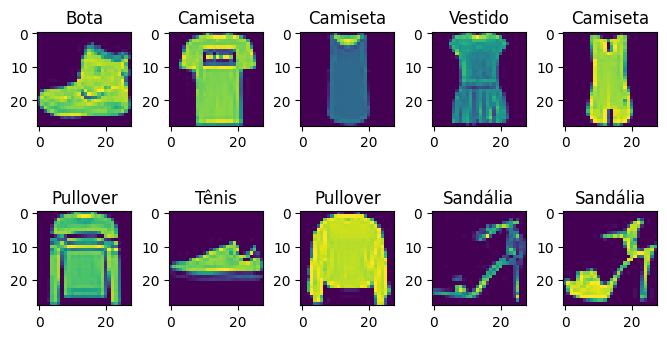

In [ ]:
plt.figure(figsize=(8, 4))

for imagem in range(total_de_classificações):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(x_treino[imagem])
  plt.title(classificações[y_treino[imagem]])

plt.subplots_adjust(wspace=0.4, hspace=0.4)

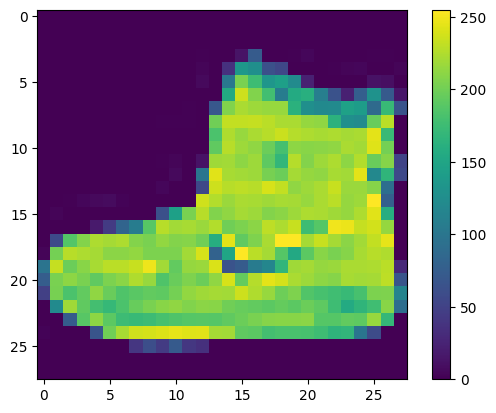

In [ ]:
plt.imshow(x_treino[0])
plt.colorbar()

# Normalizando a escala de cores das imagens

In [ ]:
x_treino = x_treino / float(255)

# Criando o modelo

In [ ]:
model = tf \
.keras \
.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
             tf.keras.layers.Dense(128, activation=tf.nn.relu),
             tf.keras.layers.Dense(32, activation=tf.nn.relu),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Compilando o modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo

In [ ]:
hist = model.fit(x_treino, y_treino, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6107 - accuracy: 0.7858 - val_loss: 0.4257 - val_accuracy: 0.8472
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4391 - accuracy: 0.8438 - val_loss: 0.3826 - val_accuracy: 0.8605
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3932 - accuracy: 0.8611 - val_loss: 0.3668 - val_accuracy: 0.8677
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3667 - accuracy: 0.8685 - val_loss: 0.3575 - val_accuracy: 0.8744
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3462 - accuracy: 0.8783 - val_loss: 0.3476 - val_accuracy: 0.8742
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3261 - accuracy: 0.8826 - val_loss: 0.3393 - val_accuracy: 0.8802
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3157 - accuracy: 0.8856 - val_loss: 0.3475 - val_accuracy:

In [ ]:
hist

# Visualizando as acurácias de treino e validação por época

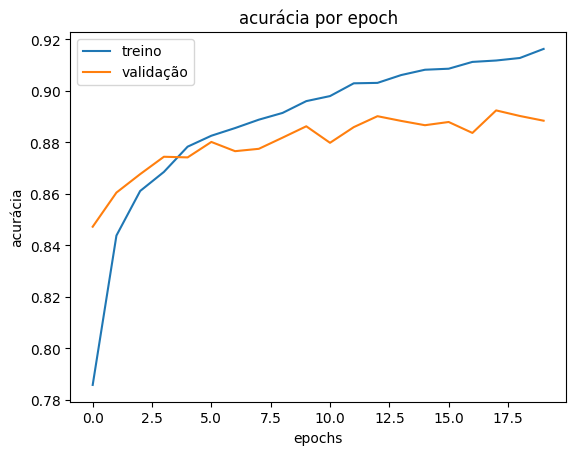

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('acurácia por epoch')
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

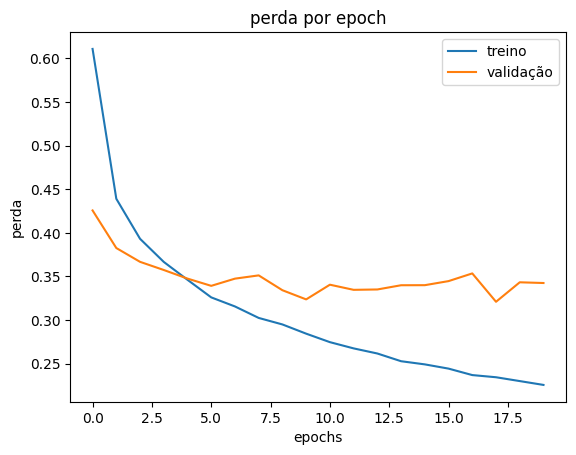

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('perda por epoch')
plt.xlabel('epochs')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Reta de treino está se ajustando demais, enquanto a de validação não consegue, nos dois casos, indicador de overfitting

# Dando um jeito no overfitting

In [ ]:
model = tf \
.keras \
.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
             tf.keras.layers.Dense(128, activation=tf.nn.relu),
             tf.keras.layers.Dropout(0.4),
             tf.keras.layers.Dense(32, activation=tf.nn.relu),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist_2 = model.fit(x_treino, y_treino, epochs=8, validation_split=0.2)

Epoch 1/8
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7263 - accuracy: 0.7449 - val_loss: 0.4503 - val_accuracy: 0.8317
Epoch 2/8
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5096 - accuracy: 0.8193 - val_loss: 0.4100 - val_accuracy: 0.8491
Epoch 3/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4609 - accuracy: 0.8343 - val_loss: 0.3982 - val_accuracy: 0.8540
Epoch 4/8
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4392 - accuracy: 0.8432 - val_loss: 0.3731 - val_accuracy: 0.8611
Epoch 5/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4233 - accuracy: 0.8485 - val_loss: 0.3672 - val_accuracy: 0.8677
Epoch 6/8
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4101 - accuracy: 0.8514 - val_loss: 0.3529 - val_accuracy: 0.8704
Epoch 7/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3947 - accuracy: 0.8560 - val_loss: 0.3501 - val_accuracy: 0.8725

In [ ]:
hist

# Visualizando as acurácias de treino e validação por época mais uma vez

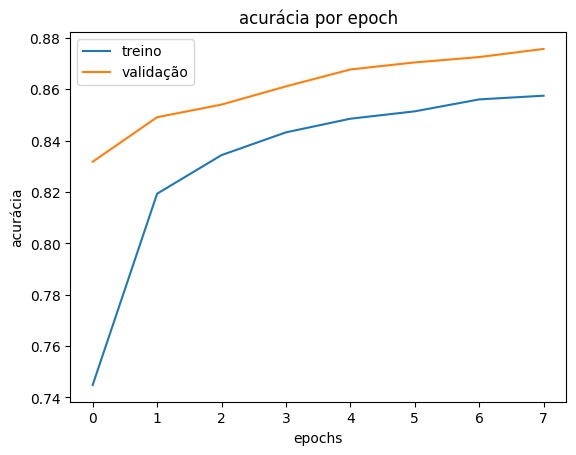

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('acurácia por epoch')
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

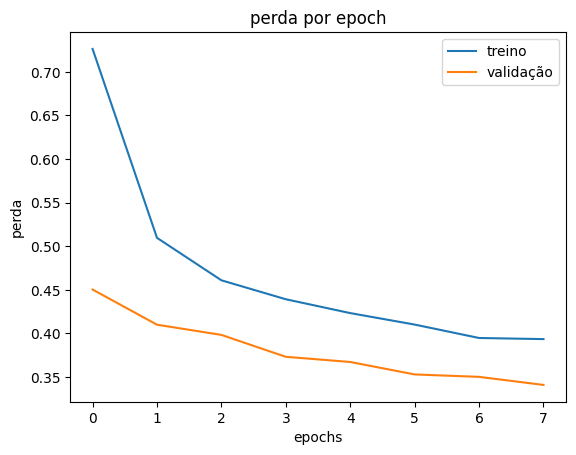

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('perda por epoch')
plt.xlabel('epochs')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# Salvando o modelo

In [ ]:
model.save('model')
model_salvo = tf.keras.models.load_model('model')

# Testando o modelo e o modelo salvo

In [ ]:
teste_model = model.predict(x_teste)
np.argmax(teste_model[1]), y_teste[1]

313/313 [==============================] - 1s 2ms/step


(2, 2)

In [ ]:
teste_model_salvo = model_salvo.predict(x_teste)
np.argmax(teste_model_salvo[1]), y_teste[1]

313/313 [==============================] - 1s 2ms/step


(2, 2)

# Avaliando o modelo

In [ ]:
model.evaluate(x_teste, y_teste)

313/313 [==============================] - 1s 2ms/step - loss: 47.8026 - accuracy: 0.8324


[47.80256652832031, 0.8324000239372253]

In [ ]:
'👎👎'

'👎👎'